In [21]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import pandas as pd
import numpy as np 
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
# %matplotlib
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from sklearn import decomposition
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [22]:
#Gestures
# dataset_0 = pd.read_csv("HandGestures/0.csv")
# dataset_1 = pd.read_csv("HandGestures/1.csv")
# dataset_2 = pd.read_csv("HandGestures/2.csv")
# dataset_3 = pd.read_csv("HandGestures/3.csv")

# X = pd.concat([dataset_0, dataset_1, dataset_2, dataset_3])

# print(X)

# Mobile Price
# train_data = pd.read_csv("MobilePrice/train.csv")
# train_data = train_data.loc[:, train_data.columns!="price_range"]

# test_data = pd.read_csv("MobilePrice/test.csv")
# test_data = test_data.loc[:, test_data.columns!="id"]
# X = pd.concat([train_data, test_data])
# print(X)

dataset = pd.read_csv("SeedUci/Seed_Data.csv")
X = dataset.loc[:, dataset.columns != "target"]
# X.sample(frac=1)
y = dataset.loc[:, dataset.columns == "target"]

X_0 = dataset.loc[dataset.target == 0]
X_0 = X_0.loc[:, X_0.columns != "target"]
X_1 = dataset.loc[dataset.target == 1]
X_1 = X_1.loc[:, X_1.columns != "target"]
X_2 = dataset.loc[dataset.target == 2]
X_2 = X_2.loc[:, X_2.columns != "target"]

In [23]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [24]:
print("Clustering tendency")
print("Hopkins value is: {}".format(hopkins(X)))
p = decomposition.PCA(n_components=3)
X_pca = p.fit_transform(X)
X_pca = pd.DataFrame(data=X_pca)
print("PCA Hopkins value is: {}".format(hopkins(X_pca)))
print("The closer the value is to 1 the higher the likelihood of clusters")

Clustering tendency
Hopkins value is: 0.8384628365713914
PCA Hopkins value is: 0.6762800521569742
The closer the value is to 1 the higher the likelihood of clusters


In [25]:
distortions = []
inertias = []
rng = range(1, 8)
for i in rng: 
    #Building and fitting the model
    kmeanModel = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42) 
    kmeanModel.fit(X)     
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_)

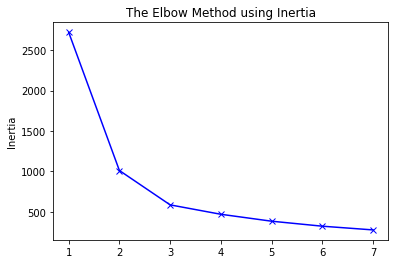

In [26]:
# %matplotlib inline
plt.plot(rng, inertias, 'bx-') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

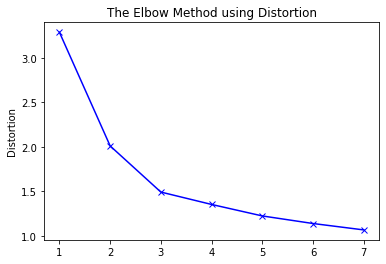

In [27]:
plt.plot(rng, distortions, 'bx-')
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

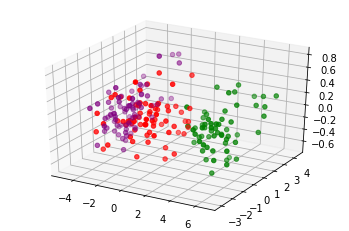

In [28]:
# %matplotlib inline
pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(X)
kmeanModel_pca = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=42) 
kmeanModel_pca.fit(X_pca)
pca_pred = kmeanModel_pca.predict(X_pca)
colors = ["red", "green", "purple"]

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=pca_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

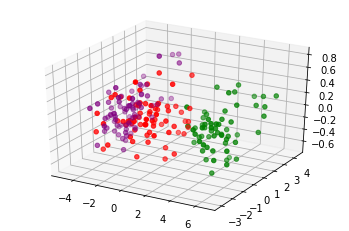

In [29]:
# %matplotlib
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=pca_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

In [30]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = sch.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

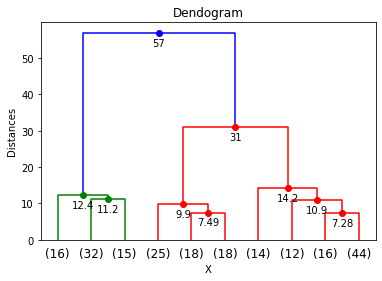

In [31]:
import scipy.cluster.hierarchy as sch
fancy_dendrogram(sch.linkage(X, method="ward"), truncate_mode="lastp", p=10)
# dendogram = sch.dendrogram(sch.linkage(X, method="ward"), truncate_mode="lastp", p=10)
plt.title("Dendogram")
plt.xlabel("X")
plt.ylabel("Distances")
plt.show()

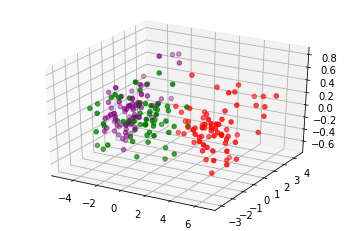

In [32]:
pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(X)
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
pca_pred = hc.fit_predict(X_pca)
colors = ["red", "green", "purple"]

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=pca_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

Silhouette Coefficient: 0.206
3
[ 0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0 -1  0  0  0  0  0  0 -1
  0 -1  0  0  0  0 -1  0  0  0  0  0 -1 -1  0 -1  0  0  0 -1  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0  0 -1  0  0  0  0  0  1  2
  2  1  2  2  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1 -1 -1  2
  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1
 -1  1  2  1 -1  1  1  1 -1 -1  1  1 -1  2 -1  0  1  0  0  2  0 -1  0  0
  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0]
{0, 1, 2, -1}


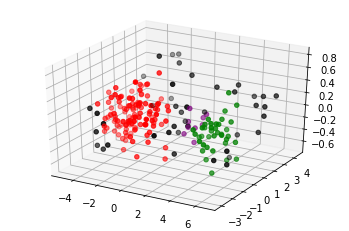

In [33]:
# Computing dbscan
pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(X)
# X_scaled = StandardScaler().fit_transform(X)
# empirijski dosli smo do 0.38 i 3
db = DBSCAN(eps=0.95, min_samples=10).fit(X_pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print(n_clusters_)
print(labels)
print(set(labels))
colors = ["black", "red", "green", "purple"]


fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

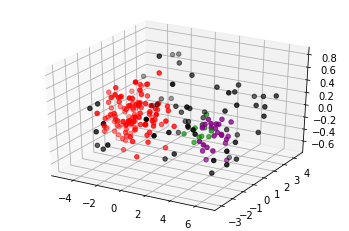

{0, 1, 2, -1}
{0, 1, 2, -1}


In [34]:
# HDBSCAN
import hdbscan

pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(X)

clusterer = hdbscan.HDBSCAN()
clusterer_labels = clusterer.fit_predict(X_pca)
colors = ["black", "red", "green", "purple"]

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusterer_labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

print(set(clusterer_labels))

# clusterer = hdbscan.HDBSCAN(cluster_selection_epsilon=0.8)
clusterer = hdbscan.HDBSCAN(min_cluster_size=4)

all_clust = clusterer.fit_predict(X)

print(set(all_clust))

In [35]:
def uniques(data):
    pom = {}
    for i in data:
        if i not in pom:
            pom[i] = 1
        else:
            pom[i] += 1
    return pom 

def get_max(dictionary):
    max = -9999
    r = ""
    for i, item in dictionary.items():
        if item > max:
            r = i
            max = item
    return r

def acc(niz, komparatori):
    hit = 0
    total = 0
    print(niz)
    print(komparatori)
    for i in range(len(niz)):
        for j, val in niz[i].items():
            if j == komparatori[i]:
                hit += val
            total += val
    return hit/total

def hi_acc(niz, komparatori):
    hit = 0
    total = 0
    print(niz)
    print(komparatori)
    for i in range(len(niz)):
        for j, val in niz[i].items():
            if j == komparatori[i]:
                hit += val
            total += val
    return hit/total

In [36]:
import time
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=int(time.time()))
kmeans = kmeans.fit(X)
predictions = kmeans.predict(X)
predictions_0 = kmeans.predict(X_0)
predictions_1 = kmeans.predict(X_1)
predictions_2 = kmeans.predict(X_2)

predictions_0 = uniques(predictions_0)
predictions_1 = uniques(predictions_1)
predictions_2 = uniques(predictions_2)

print("0: {}, 0 -> {}".format(predictions_0, get_max(predictions_0)))
print("1: {}, 1 -> {}".format(predictions_1, get_max(predictions_1)))
print("2: {}, 2 -> {}\nAccuracy".format(predictions_2, get_max(predictions_2)))

compare_0 = get_max(predictions_0)
compare_1 = get_max(predictions_1)
compare_2 = get_max(predictions_2)

acc([predictions_0, predictions_1, predictions_2], [compare_0, compare_1, compare_2])

0: {2: 60, 1: 9, 0: 1}, 0 -> 2
1: {0: 60, 2: 10}, 1 -> 0
2: {1: 68, 2: 2}, 2 -> 1
Accuracy
[{2: 60, 1: 9, 0: 1}, {0: 60, 2: 10}, {1: 68, 2: 2}]
[2, 0, 1]


0.8952380952380953

In [37]:
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predictions = hc.fit_predict(X)
print(predictions)
print(y)
num_0 = len(y.loc[y.target == 0])
num_1 = len(y.loc[y.target == 1])
num_2 = len(y.loc[y.target == 2])

pred_0 = predictions[0:num_0]
pred_1 = predictions[num_0:num_0+num_1]
pred_2 = predictions[num_0+num_1:num_0+num_1+num_2]

uniq_0 = uniques(pred_0)
uniq_1 = uniques(pred_1)
uniq_2 = uniques(pred_2)

comp_0 = get_max(uniq_0)
comp_1 = get_max(uniq_1)
comp_2 = get_max(uniq_2)

print(comp_0)

acc([uniq_0, uniq_1, uniq_2], [comp_0, comp_1, comp_2])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 0 2 2 2 2 2 2
 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 0 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
     target
0         0
1         0
2         0
3         0
4         0
..      ...
205       2
206       2
207       2
208       2
209       2

[210 rows x 1 columns]
2
[{2: 54, 0: 16}, {1: 63, 2: 7}, {0: 70}]
[2, 1, 0]


0.8904761904761904

In [38]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [39]:
def calculate_same_clusters(first, second):
    c = 0
    u = 0
    f = first.pred.tolist()
    for i in range(len(first)):
        others = second[second.index == first.index.values[i]]
        o = others.pred.tolist()
        for j in range(len(o)):
            if f[i] == o[j]:
                c += 1
            u += 1
    return c/u

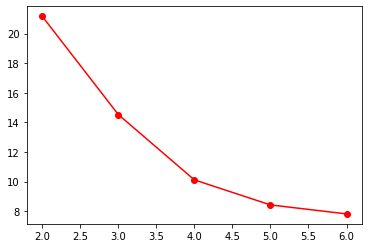

In [40]:
k = len(X)
new_sets = []
for i in range(10):
    # new_set_indexes = np.random.choice(X.index.values, k)
    new_set = X.sample(frac=1, replace=True)
    new_sets.append(new_set)

combined_sets = {}
new_clusters = {}
for i in range(10):
    new_clusters[i] = {}
    combined_sets[i] = {}
    for j in range(2, 7):
        kmeanModel = KMeans(n_clusters=j, init="k-means++", max_iter=300, n_init=10, random_state=42) 
        ck = kmeanModel.fit_predict(new_sets[i])
        new_clusters[i][j] = ck
        s = pd.DataFrame(ck, columns=["pred"])
        combined_sets[i][j] = pd.concat([pd.DataFrame(new_sets[i].values), s], axis=1)
        combined_sets[i][j].set_index(new_sets[i].index.values, inplace=True)

calcs = {}
for i in range(9):
    for j in range(i + 1, 10):
        for k in range(2, 7):
            if not k in calcs:
                calcs[k] = 0
            first_cluster = combined_sets[i][k]
            second_cluster = combined_sets[j][k]
            same_ind = first_cluster.index.isin(second_cluster.index)
            same_ind2 = second_cluster.index.isin(first_cluster.index)
            # print(same_ind)
            # print(first_cluster)
            first_cluster = first_cluster[same_ind]
            second_cluster = second_cluster[same_ind2]
            # print(first_cluster)
            value = calculate_same_clusters(first_cluster, second_cluster)
            calcs[k] += value
l = list(calcs.values())
plt.plot(range(2,7), l, "ro-")

plt.show()